### 用RNN实现输入一个字母，预测下一个字母（字母onehot编码）

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense,SimpleRNN
from matplotlib import pyplot as plt
import os

In [2]:
input_word = "abcde"
# 把字母表示为数字
w_to_id ={"a":0,
          "b":1,
          "c":2,
          "d":3,
          "e":4}
# 把数字编码为独热码
id_to_onehot = {
    0:[1., 0., 0., 0., 0.],
    1:[0., 1., 0., 0., 0.],
    2:[0., 0., 1., 0., 0.],
    3:[0., 0., 0., 1., 0.],
    4:[0., 0., 0., 0., 1.]
}
x_train = [id_to_onehot[w_to_id['a']],
           id_to_onehot[w_to_id['b']],
           id_to_onehot[w_to_id['c']],
           id_to_onehot[w_to_id['d']],
           id_to_onehot[w_to_id['e']]
          ]
y_train = [w_to_id['b'],
          w_to_id['c'],
          w_to_id['d'],
          w_to_id['e'],
          w_to_id['a']
          ]
print("x_train:{}\n".format(x_train))
print("y_train:{}\n".format(y_train))

x_train:[[1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0]]

y_train:[1, 2, 3, 4, 0]



In [3]:
np.random.seed(7)
np.random.shuffle(x_train)
np.random.seed(7)
np.random.shuffle(y_train)
tf.random.set_seed(7)


In [4]:
# 把输入特征变为RNN期待的形状
# 使x_train符合SimpleRNN输入要求：[送入样本数，循环核时间展开步数,单个时间步输入特征个数]
# 此处是整个数据集送入，送入样本数为len(x_train)，
# 输入一个字母出结果，循环核时间展开步数为1
# 表示为独热码有5个输入特征，每个时间步输入特征个数是5
x_train = np.reshape(x_train,(len(x_train),1,5))
y_train = np.array(y_train)

In [5]:
# 搭建具有3个记忆体的循环层
# 记忆体个数越多，记忆力越好，计算量越大
model = tf.keras.Sequential([
    SimpleRNN(3),
    Dense(5,activation="softmax")
])

model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['sparse_categorical_accuracy'])
checkpoint_save_path = "./checkpoint/rnn_onehot_lprel.ckpt"
if os.path.exists(checkpoint_save_path + '.index'):
    print("-----load the model ----")
    model.load_weights(checkpoint_save_path)
# 由于fit没有给出测试集，不计算测试集准确率，根据loss，保存最优模型
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_save_path,
                                                save_best_only=True,
                                                save_weights_only=True,
                                                monitor='loss')
history = model.fit(x_train,y_train,batch_size=32,epochs=100,callbacks=[cp_callback])
model.summary()



-----load the model ----
Train on 5 samples
Epoch 1/100
5/5 [==============================] - 1s 171ms/sample - loss: 0.4219 - sparse_categorical_accuracy: 1.0000
Epoch 2/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.4136 - sparse_categorical_accuracy: 1.0000
Epoch 3/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.4055 - sparse_categorical_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3974 - sparse_categorical_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3895 - sparse_categorical_accuracy: 1.0000
Epoch 6/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3818 - sparse_categorical_accuracy: 1.0000
Epoch 7/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3741 - sparse_categorical_accuracy: 1.0000
Epoch 8/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.3666 - sparse_categorical_accuracy: 1.0000
Epoch 9/10

Epoch 70/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1192 - sparse_categorical_accuracy: 1.0000
Epoch 71/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1176 - sparse_categorical_accuracy: 1.0000
Epoch 72/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1161 - sparse_categorical_accuracy: 1.0000
Epoch 73/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1146 - sparse_categorical_accuracy: 1.0000
Epoch 74/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1131 - sparse_categorical_accuracy: 1.0000
Epoch 75/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1117 - sparse_categorical_accuracy: 1.0000
Epoch 76/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1103 - sparse_categorical_accuracy: 1.0000
Epoch 77/100
5/5 [==============================] - 0s 4ms/sample - loss: 0.1089 - sparse_categorical_accuracy: 1.0000
Epoch 78/100
5/5 [==============================

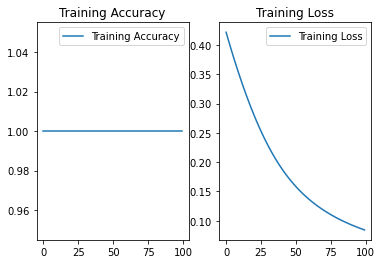

In [6]:
with open("./weights.txt","w") as f:
    for v in model.trainable_variables:
        f.writelines(str(v.name))
        f.writelines(str(v.shape))
        f.writelines(str(v.numpy()))

acc = history.history['sparse_categorical_accuracy']
loss = history.history['loss']

plt.subplot(1,2,1)
plt.plot(acc,label="Training Accuracy")
plt.title("Training Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(loss,label="Training Loss")
plt.title("Training Loss")
plt.legend()

plt.show()

In [9]:
# predict 
preNum = int(input("input the number of test alphabet:"))
for i in range(preNum):
    # 输入字母
    alphabet1 = input("input test alphanet:")
    # 调整为独热码
    alphabet = [id_to_onehot[w_to_id[alphabet1]]]
    # 此处验证效果送入1个样本，输入1个字母出结果，所以循环核时间展开步数为1
    # 表示为独热码有5个输入特征。单个时间步输入特征为5
    alphabet = np.reshape(alphabet,(1,1,5))
    result = model.predict([alphabet])
    pred = tf.argmax(result,axis=1)
    pred = int(pred)
    tf.print(alphabet1 + '->' + input_word[pred])

input the number of test alphabet:5
input test alphanet:a
a->b
input test alphanet:c
c->d
input test alphanet:b
b->c
input test alphanet:d
d->e
input test alphanet:e
e->a
